In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def colvar_to_df(f):
    colnames=f.readline().strip('#! FIELDS ').split()
    return pd.read_table(f,skiprows=0,header=None,sep=' ',names=colnames).set_index(colnames[0])
 

In [7]:
with open('rmsd\\COLVAR_rmsd','r') as f:
    df = colvar_to_df(f)
df.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,c22,c23,c24,c25,c26,c27,t1,uwall.bias,uwall.force2,metad.bias
time,,,,,,,,,,,,,,,,,,,,,
0.0,9.762466,3.210508,3.042146,2.965473,2.742020,2.884546,2.684792,2.814178,3.118763,2.990318,...,2.078497,2.555285,2.182926,2.730650,2.147061,2.538120,6.505001,0.0,0.0,0.000000
0.2,9.701774,3.320115,3.070340,2.907083,2.710783,2.885333,2.764909,2.869621,3.070589,3.019099,...,2.032953,2.510067,2.199769,2.678044,2.102203,2.555101,6.447453,0.0,0.0,0.000000
0.4,9.764021,3.377267,3.153036,2.942039,2.786166,2.764224,2.773239,2.842606,2.962681,2.992273,...,2.062498,2.499024,2.274892,2.697144,2.165230,2.567816,6.462730,0.0,0.0,0.000000
0.6,9.773051,3.374883,3.220844,2.880025,2.771641,2.773843,2.739613,2.837450,2.909471,3.135259,...,2.081170,2.490877,2.277138,2.737540,2.227064,2.558925,6.549111,0.0,0.0,0.296930
0.8,9.820055,3.394860,3.252054,2.764179,2.778254,2.762008,2.788676,2.875959,3.032777,3.138011,...,2.113219,2.538166,2.242780,2.734764,2.334998,2.570402,6.577566,0.0,0.0,0.291596


In [8]:
df.describe()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,c22,c23,c24,c25,c26,c27,t1,uwall.bias,uwall.force2,metad.bias
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000
mean,9.218364,3.305862,3.249065,2.904779,2.714147,2.856528,2.901576,2.772828,2.808973,3.141010,...,0.939045,1.145525,0.964707,1.331689,1.151079,0.890739,4.261257,77.146605,9.257593e+04,956.244615
std,0.211740,0.114216,0.125430,0.102234,0.110667,0.047616,0.135668,0.045823,0.055754,0.074191,...,0.187817,0.190517,0.180490,0.171366,0.200170,0.292053,2.634583,240.064523,2.880774e+05,563.267743
min,7.934447,2.766390,2.704486,2.494438,2.303169,2.543942,2.416324,2.453396,2.563524,2.783258,...,0.497417,0.377688,0.750931,0.938532,0.646672,0.381542,0.016135,0.000000,0.000000e+00,0.000000
25%,9.080305,3.228283,3.167781,2.836351,2.638514,2.825815,2.794507,2.746902,2.771336,3.091591,...,0.875054,1.035509,0.919567,1.291362,1.053393,0.726036,1.978990,0.000000,0.000000e+00,452.049972
50%,9.223766,3.306666,3.253384,2.902981,2.706119,2.856699,2.920128,2.775396,2.808416,3.144141,...,0.930564,1.126250,0.944981,1.314381,1.163784,0.815438,4.238986,0.000000,0.000000e+00,941.255651
75%,9.368266,3.384070,3.332974,2.974241,2.778157,2.887474,3.007424,2.802450,2.845887,3.193596,...,0.979407,1.220204,0.971837,1.339450,1.215939,0.966686,6.506429,0.000000,0.000000e+00,1435.703412
max,9.890557,3.851785,3.794267,3.389688,3.123802,3.109568,3.318023,3.021629,3.170324,3.410241,...,3.581263,3.198033,3.530367,3.723471,3.548840,3.511126,9.353501,1661.690514,1.994029e+06,1999.667337


<AxesSubplot:title={'center':'RMSD over time'}, xlabel='time'>

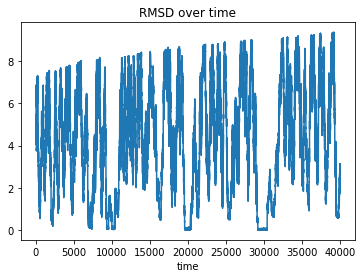

In [10]:
df['t1'].plot(title='RMSD over time')

<AxesSubplot:title={'center':'Histogram of RMSD\nStride=100 frames | 50 bins'}, ylabel='Frequency'>

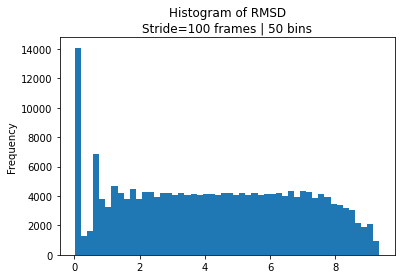

In [24]:
df['t1'].plot.hist(bins=50,title='Histogram of RMSD\nStride=100 frames | 50 bins')

<AxesSubplot:xlabel='time'>

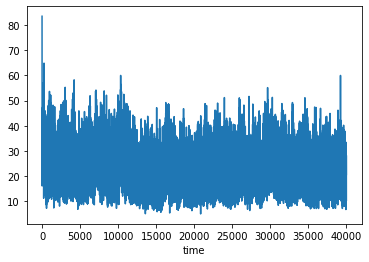

In [19]:
df['restraint.bias'].plot()